# TP16 : Enveloppe convexe, algorithme de Graham
On appelle _nuage de points_ un ensemble fini de points du plan.
Il s'agit ici de calculer l'enveloppe convexe d'un nuage de points.

Dans tout ce qui suit, on supposera, sans avoir à le vérifier, que :
* tous les nuages de points considérés ont cardinal au moins 3;
* tous les points sont à coordonnées entières;
* les points d'un nuage sont deux à deux distincts et
* les points d'un nuage sont en position générale (c'est-à-dire que trois points quelconques du nuage ne sont jamais alignés).

### Exercice 1 : lecture de points dans un fichier
Écrire une fonction `lecture` qui prend en argument un nom de fichier contenant sur chaque ligne deux entiers séparés par une virgule et représentants des coordonnées de points (dans l'ordre: abscisse puis ordonnée) et renvoie un couple de listes dont la première contient les abscisses des points et la deuxième les ordonnées (sous forme d'entiers, pas de chaînes de caractères).

In [30]:
abs, ord = lecture('points1')
assert(len(abs) == 46 and len(ord) == 46)
assert(abs[17] == 0 and ord[17] == -8)

## Tracer des points
Pour tracer des points, on utilise le module `matplotlib.pyplot`, par exemple de la manière suivante:

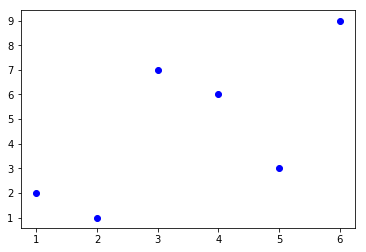

In [31]:
%matplotlib inline  
##la ligne précédente n'est pas du python, elle est là pour que l'affichage se fasse sur le notebook

import matplotlib.pyplot as plt 

def trace(x, y, color="blue"):
    """x : tableau des abscisses
    y : tableau des ordonnées
    color : couleur (bleu par défaut)"""
    assert(len(x) == len(y))
    plt.scatter(x, y, color=color)

trace([1,2,3,4,5,6], [2,1,7,6,3,9])

Pour tracer des traits entre les points, on utilise le même module, par exemple de la manière suivante:

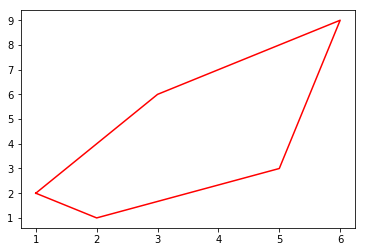

In [32]:
%matplotlib inline  
##la ligne précédente n'est pas du python, elle est là pour que l'affichage se fasse sur le notebook

import matplotlib.pyplot as plt 

def polygone(x, y, color="red"):
    """x : tableau des abscisses
    y : tableau des ordonnées
    color : couleur (rouge par défaut)"""
    assert(len(x) == len(y))
    plt.plot(x+[x[0]], y+[y[0]], color=color)

polygone([1,2,5,6,3], [2,1,3,9,6])

On peut par exemple tracer ;es points lus dans un fichier:

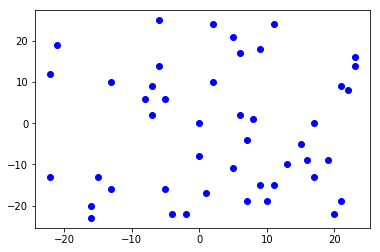

In [33]:
abs, ord = lecture('points1')
trace(abs, ord)

### Exercice 2 : point le plus bas
Écrire une fonction `plus_bas` qui prend en argument un tableau d'abscisses et un tableau d'ordonnées et renvoie l'indice du point le plus bas. S'il y a plusieurs points les plus bas, alors la fonction doit renvoyer l'indice du point le plus à gauche parmi les points les plus bas.

In [35]:
abs, ord = lecture('points1')
assert(plus_bas(abs, ord) == 4)

### Exercice 3 : orientation
Étant donnés trois points $p,q,r$ d'un nuage de points, distincts ou non, le test d'orientation renvoie un entier strictement positif si la suite $(p,q,r)$ est orientée positivement, un entier strictement négatif si elle est orientée négativement et $0$ si les trois points sont alignés (c'est-à-dire si deux au moins d'entre eux sont égaux, d'après l'hypothèse de position générale).

![](orientation.png)

Pour déterminer l’orientation de $(p,q,r)$, il suffit de calculer l’aire signée du triangle, comme illustré sur la figure précédente. Cette aire est la moitié du déterminant de la matrice $2\times 2$ formée par les coordonnées des vecteurs $\vec{pq}$ et $\vec{pr}$.

Écrire une fonction `orientation` qui prend en argument trois triplets contenant respectivement les abscisses et les ordonnées des points $p$ , $q$ et $r$ (dans cet ordre) et renvoie l'orientation de $(p,q,r)$ telle que décrite ci-dessus.

In [36]:
def orientation(p, q, r):
    return (q[0]-p[0])*(r[1]-p[1]) - (q[1]-p[1])*(r[0]-p[0])

In [37]:
p = (1, 3)
q = (5, 7)
r = (-2, 4)
assert(orientation(p, q, r) > 0)
assert(orientation(p, r, q) < 0)
assert(orientation(q, p, r) < 0)
assert(orientation(q, r, p) > 0)

## Algorithme de balayage
Cet algorithme a été proposé par R. Graham en 1972. Nous allons écrire la variante (plus simple) proposée par A. Andrew quelques années plus tard.

**On suppose que les points fournis dans un nuage de points sont triés par abscisses croissantes.**

L'idée de l'algorithme est de balayer le nuage de points horizontalement de gauche à droite par une droite verticale, tout en mettant à jour l'enveloppe convexe des points du nuage situés à gauche de cette droite, comme illustré dans la figure suivante:

![](algo.png)

Plus précisément, l'algorithme visite chaque point du nuage une fois, par ordre croissant d'abscisses (donc par ordre croissant d'indice dans les listes de coordonnés de points du nuage car celles sont triées en fonction des abscisses des points par hypothèse). 

À chaque
nouveau point $p_i$ visité, il met à jour le bord de l'enveloppe convexe du sous-nuage $\{p_0,\dots,p_i\}$ situé à gauche de $p_i$. On remarque que les points $p_0$ et $p_i$ sont sur ce bord, et on appelle
_enveloppe supérieure_ la partie du bord de l'enveloppe convexe de $\{p_0,\dots,p_i\}$ située au-dessus de la droite passant par $p_0$ et $p_i$ ($p_0$ et $p_i$ compris), et _enveloppe inférieure_ la partie du bord de l'enveloppe convexe de $\{p_0,\dots,p_i\}$ située au-dessous de cette droite ($p_0$ et $p_i$ compris). Le bord de l'enveloppe convexe de $\{p_0,\dots,p_i\}$ est donc constitué de l'union de ces deux enveloppes, après suppression des
doublons de $p_0$ et $p_i$.

**exemple:**
Dans le cas du nuage de la partie gauche de la figure ci-dessus, le sous-nuage $\{p_0,p_1,p_2,p_3,p_4\}$ a pour enveloppe supérieure la suite $(p_0,p_2,p_4)$ et pour enveloppe inférieure la suite $(p_0,p_3,p_4)$, le bord de son enveloppe convexe étant donné par la suite $(p_0,p_3,p_4,p_2)$.

Informatiquement, les indices des sommets des enveloppes inférieure et supérieure seront stockés dans deux listes d'entiers séparées, `ei` (pour *enveloppe inférieure*) et`es` (pour *enveloppe supérieure*).

La mise à jour de l'enveloppe supérieure est illustrée dans la figure suivante:

![](maj_env.png)

Tant que le point visité (ici $p_9$) et les deux points dont les indices sont situés à la fin de la liste `es` (ici $p_8$ et $p_5$) forment une séquence d'orientation négative (ici $(p_9,p_8,p_5)$), on supprime l'indice situé à la fin de la liste `es` (ici $p_8$). On poursuit ce processus d'élimination jusqu'à ce que l'orientation devienne positive ou qu'il ne reste plus qu'un seul indice dans la liste. L'indice du point visité (ici $p_9$) est alors ajouté à la fin de `es`. La mise à jour de l'enveloppe inférieure s'opère de manière symétrique.

### Exercice 4 : mise à jour des enveloppes inférieure et supérieure
Écrire une fonction `maj` qui prend en argument deux listes représentant les abscisses et les ordonnées de points d'un nuage $P$, l'indice $i$ d'un point dans ce nuage, une liste pour l'enveloppe (inférieure ou supérieure) des $i$ premiers points de $P$ et un signe permettant de savoir si on travaille sur l'enveloppe supérieure ou l'enveloppe inférieure (1 pour l'enveloppe supérieure, -1 pour l'enveloppe inférieure), et met à jour la pile en tenant compte du point de $P$ d'indice $i$ en suivant l'algorithme décrit ci-dessus.


In [63]:
abs, ord = [1,2,3,4,5,6], [2,1,7,6,3,9]
es = []
maj(abs, ord, 0, es, 1)
assert(es == [0])
maj(abs, ord, 1, es, 1)
assert(es == [0, 1])
maj(abs, ord, 2, es, 1)
assert(es == [0, 2])
maj(abs, ord, 3, es, 1)
assert(es == [0, 2, 3])
maj(abs, ord, 4, es, 1)
assert(es == [0, 2, 3, 4])
maj(abs, ord, 5, es, 1)
assert(es == [0, 2, 5])

ei = []
maj(abs, ord, 0, ei, -1)
assert(ei == [0])
maj(abs, ord, 1, ei, -1)
assert(ei == [0, 1])
maj(abs, ord, 2, ei, -1)
assert(ei == [0, 1, 2])
maj(abs, ord, 3, ei, -1)
assert(ei == [0, 1, 3])
maj(abs, ord, 4, ei, -1)
assert(ei == [0, 1, 4])
maj(abs, ord, 5, ei, -1)
assert(ei == [0, 1, 4, 5])

### Exercice 5 : enveloppe convexe
Écrire une fonction `enveloppe_convexe` qui prend en argument une liste d'abscisses et une liste d'ordonnées d'un nuage de points et renvoie une liste d'indices donnant son enveloppe convexe.

In [65]:
abs, ord = [1,2,3,4,5,6], [2,1,7,6,3,9]
assert(enveloppe_convexe(abs, ord) == [0, 1, 4, 5, 2])

### Exercice 6: tracer l'enveloppe convexe
Écrire une fonction `coord_env_conv` qui prend en argument une liste d'abscisses et une liste d'ordonnées d'un nuage de points et renvoie deux listes contenant les abscisses et les ordonnées des points de l'enveloppe convexe du nuage.

Regardons si ça semble fonctionner:

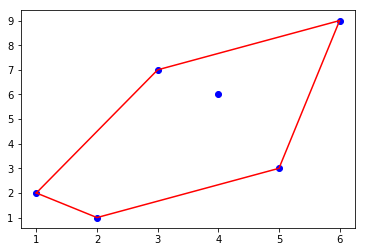

In [41]:
abs, ord = [1,2,3,4,5,6], [2,1,7,6,3,9]
trace(abs, ord)
env = enveloppe_convexe(abs, ord)
env_abs, env_ord = coord_env_conv(abs, ord, env)
polygone(env_abs, env_ord)

Sur un exemple plus grand:

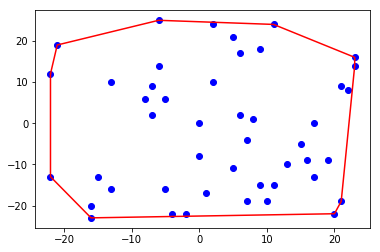

In [43]:
abs, ord = lecture('points1')
trace(abs, ord)
env = enveloppe_convexe(abs, ord)
env_abs, env_ord = coord_env_conv(abs, ord, env)
polygone(env_abs, env_ord)